In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Load/Display

In [119]:
# Read the image
image = cv2.imread('leaf.png')

# Print the shape of the image matrix
print(f"Image shape (rows, columns, channels): {image.shape}")

Image shape (rows, columns, channels): (360, 360, 3)


In [120]:
def plot_image(image, title=None):
    # Convert the image from BGR (OpenCV default) to RGB for displaying correctly in matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image in the notebook
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes
    # Set the title if provided
    if title:
        plt.title(title)
    plt.show()

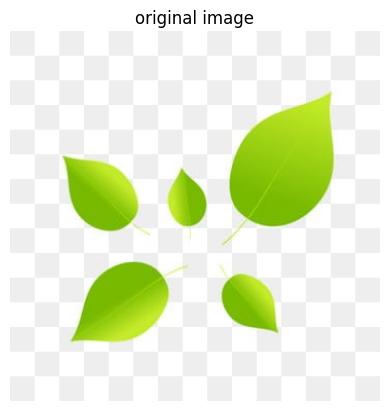

In [121]:
plot_image(image, "original image")

## Converting to Grayscale

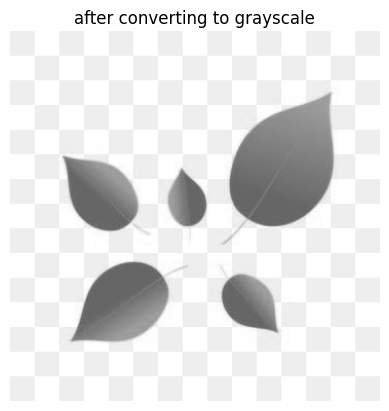

In [131]:
# Perform a raw operation: Convert image to grayscale
grayscale_image = np.mean(image, axis=2).astype(np.uint8)
plot_image(grayscale_image, "after converting to grayscale")

## Read the image and write the intensity value in a file

In [123]:
# Save the RGB intensity values to a single file
# Ensure we're saving as integers with proper formatting
np.savetxt('rgb_intensity_values.txt', image.reshape(-1, image.shape[2]), fmt='%d', delimiter=', ')
print("RGB intensity values have been written to 'rgb_intensity_values.txt'.")

RGB intensity values have been written to 'rgb_intensity_values.txt'.


## Multiply/add/subtract each intensity value by a constant and display the image back

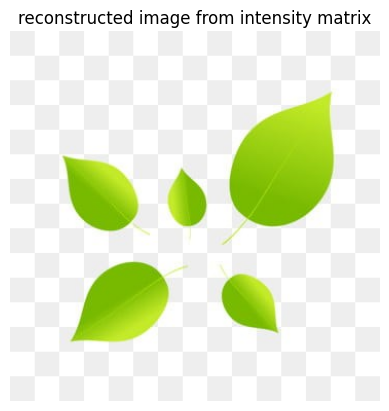

In [124]:
# Step to read the RGB intensity values from the text file
loaded_rgb_matrix = np.loadtxt('rgb_intensity_values.txt', delimiter=',', dtype=np.uint8)

# Reshape the loaded data back to the original image dimensions
height, width, _ = image.shape  # Get the original dimensions
reconstructed_image = loaded_rgb_matrix.reshape((height, width, 3))
plot_image(reconstructed_image, "reconstructed image from intensity matrix")

In [125]:
# Define constant for operation
constant = 50

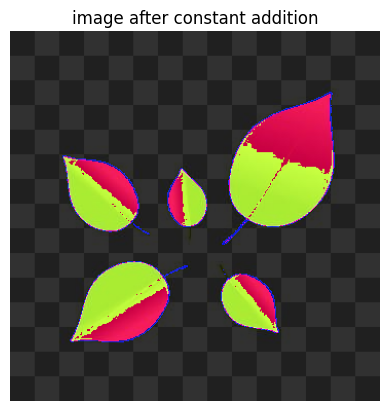

In [126]:
# Adding the constant
added_image = np.clip(reconstructed_image + constant, 0, 255).astype(np.uint8)
plot_image(added_image, "image after constant addition")

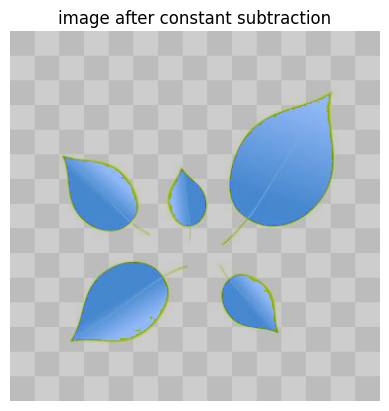

In [127]:
# Subtracting the constant
subtracted_image = np.clip(reconstructed_image - constant, 0, 255).astype(np.uint8)
plot_image(subtracted_image, "image after constant subtraction")

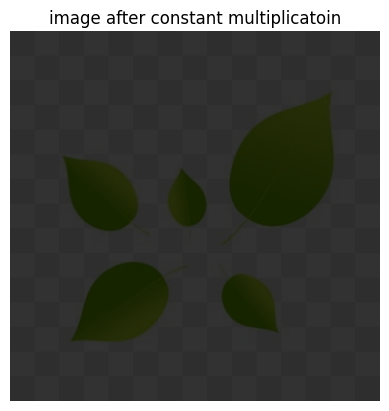

In [128]:
# Multiplying by the constant
multiplied_image = np.clip(reconstructed_image * (constant / 255.0), 0, 255).astype(np.uint8)
plot_image(multiplied_image, "image after constant multiplicatoin")

## Subtract each intensity value from 255 and display

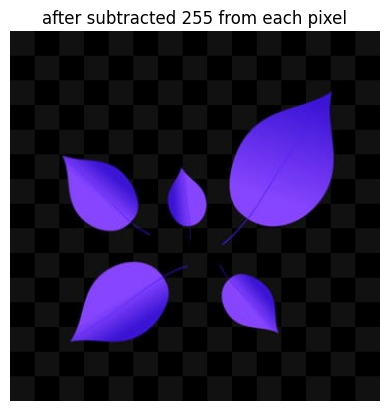

In [129]:
# Subtract each intensity value from 255
inverted_image = 255 - reconstructed_image
plot_image(inverted_image, "after subtracted 255 from each pixel")

## Try to separate each channel of the initial RGB image and display separately

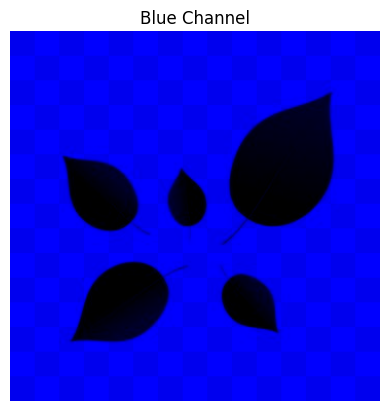

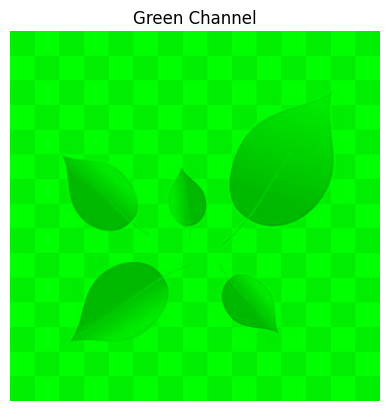

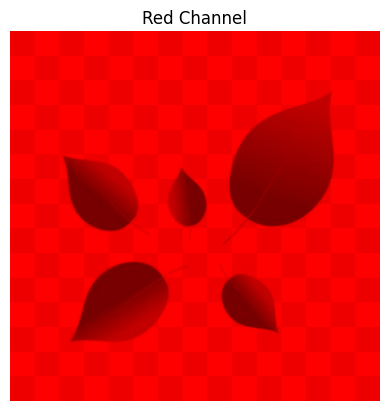

In [130]:
# Split the image into its RGB channels
blue_channel = image[:, :, 0]  # Blue channel
green_channel = image[:, :, 1]  # Green channel
red_channel = image[:, :, 2]  # Red channel

# Create an empty image for each channel to visualize them separately
blue_image = np.zeros_like(image)
blue_image[:, :, 0] = blue_channel  # Set blue channel

green_image = np.zeros_like(image)
green_image[:, :, 1] = green_channel  # Set green channel

red_image = np.zeros_like(image)
red_image[:, :, 2] = red_channel  # Set red channel

# Plot each channel separately
plot_image(blue_image, title='Blue Channel')
plot_image(green_image, title='Green Channel')
plot_image(red_image, title='Red Channel')

## Convolution

In [132]:
grayscale_image

array([[238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238],
       ...,
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238],
       [238, 238, 238, ..., 238, 238, 238]], dtype=uint8)

In [136]:
# Step 1: Define a 2x2 diagonal matrix
diagonal_kernel = np.array([[1, 0],
                            [0, 1]])

In [141]:
# Step 2: Perform the convolution-like operation using raw loops
def convolve_image(image, kernel):
    kernel_size = kernel.shape[0]  # Assuming kernel is square (2x2)
    output_image = np.zeros_like(image, dtype=np.uint8)

    # Loop over each pixel of the image (excluding borders)
    for i in range(height - kernel_size + 1):
        for j in range(width - kernel_size + 1):
            # Extract the current 2x2 region from the image
            region = image[i:i + kernel_size, j:j + kernel_size]
            
            # Element-wise multiply the region with the kernel
            result = np.sum(region * kernel)
            # Assign the result to the output image (center of the region)
            output_image[i + 1, j + 1] = result
    
    return output_image

# Perform the operation
convolute_image = convolve_image(grayscale_image, diagonal_kernel)

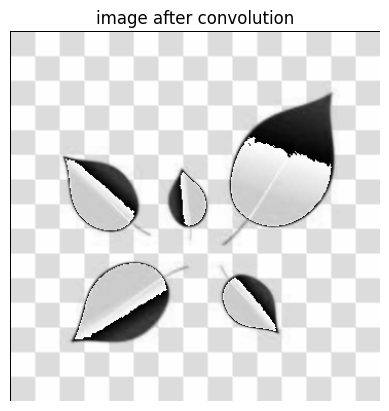

In [142]:
plot_image(convolute_image, "image after convolution")